___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [163]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [165]:
df.shape

(10000, 14)

In [166]:
df.isnull().sum().any()

False

In [167]:
df.duplicated().sum()

0

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [169]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

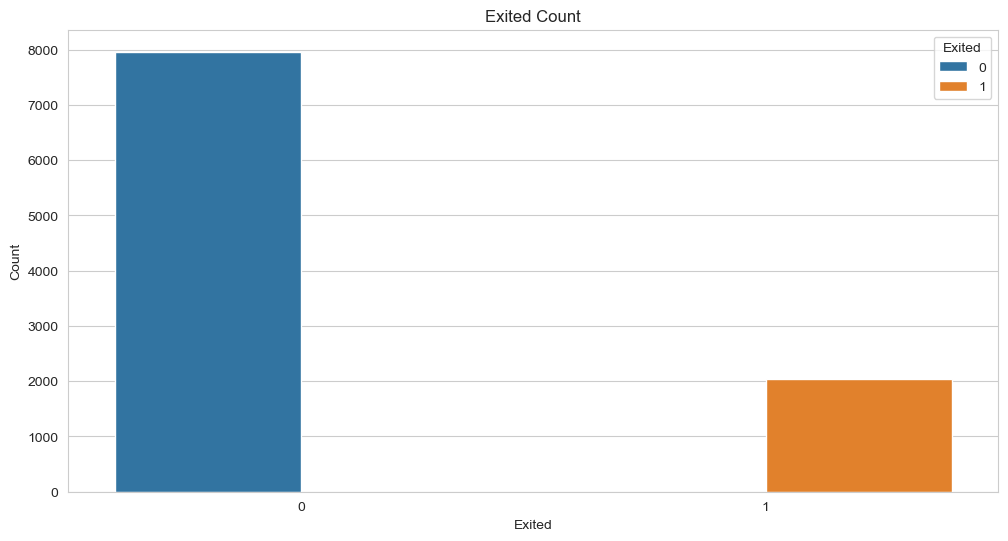

In [170]:
value_counts = df.Exited.value_counts()

sns.countplot(x="Exited", data=df, hue="Exited")

plt.title("Exited Count")
plt.xlabel("Exited")
plt.ylabel("Count")

plt.show()

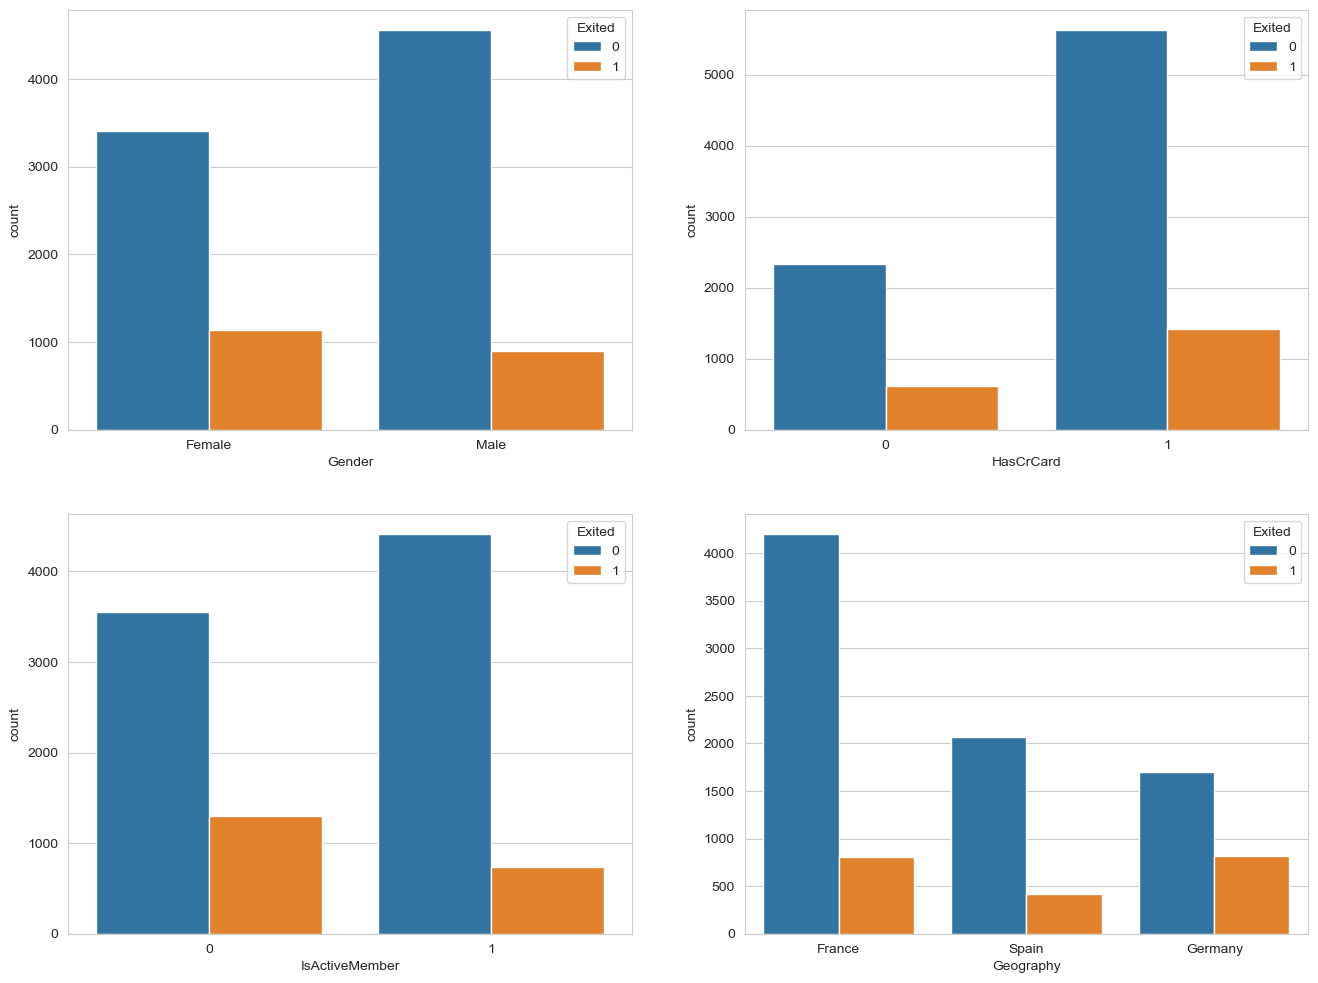

In [171]:
categorics = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in categorics:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

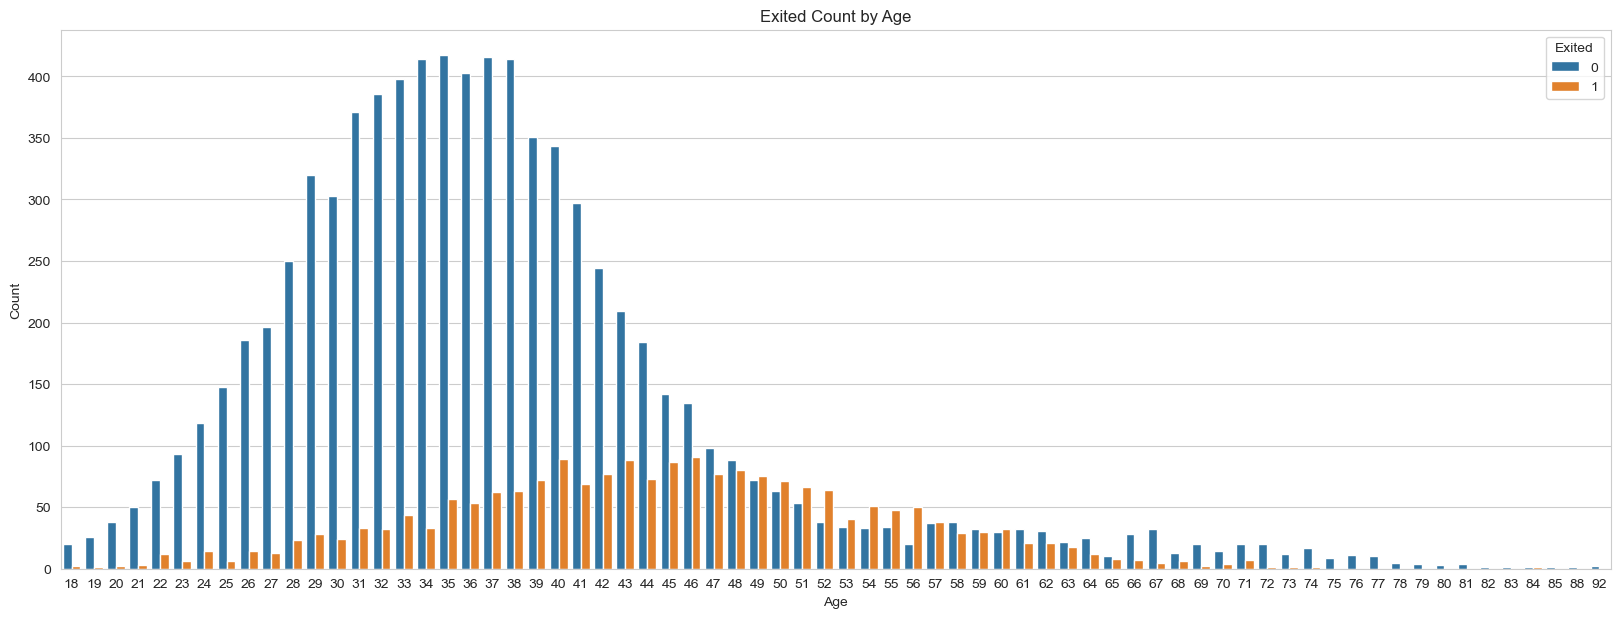

In [172]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df.Age, hue=df.Exited)
plt.title("Exited Count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [173]:
df.CreditScore.describe()   #kredi verenler için daha güvenilir bir müşteri

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [174]:
def credit_transformer(x, y):
    if x < 350 and y == 0:
        return 0
    if x < 350 and y > 0:
        return 1
    if x < 718 and y == 0:
        return 2
    if x < 718 and y > 0:
        return 3
    else:
        return 4

In [175]:
customer_value = [
    credit_transformer(x, y) for x, y in zip(df.CreditScore, df.HasCrCard)  #hascrcard: Bankanın müşteriye verdiği kredi kartı sayısıdır.
]
customer_value[:10]

[3, 2, 3, 2, 4, 3, 4, 3, 2, 3]

In [176]:
df.insert(10, "customer_value", customer_value)   #10. sütun olarak ekle

In [177]:
df.customer_value

0       3
1       2
2       3
3       2
4       4
       ..
9995    4
9996    3
9997    2
9998    4
9999    4
Name: customer_value, Length: 10000, dtype: int64

In [178]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

result = encoder.fit_transform(df.customer_value.values.reshape(-1, 1)) 
print(result)

df.customer_value = result

[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [2.]
 [2.]]


<Axes: >

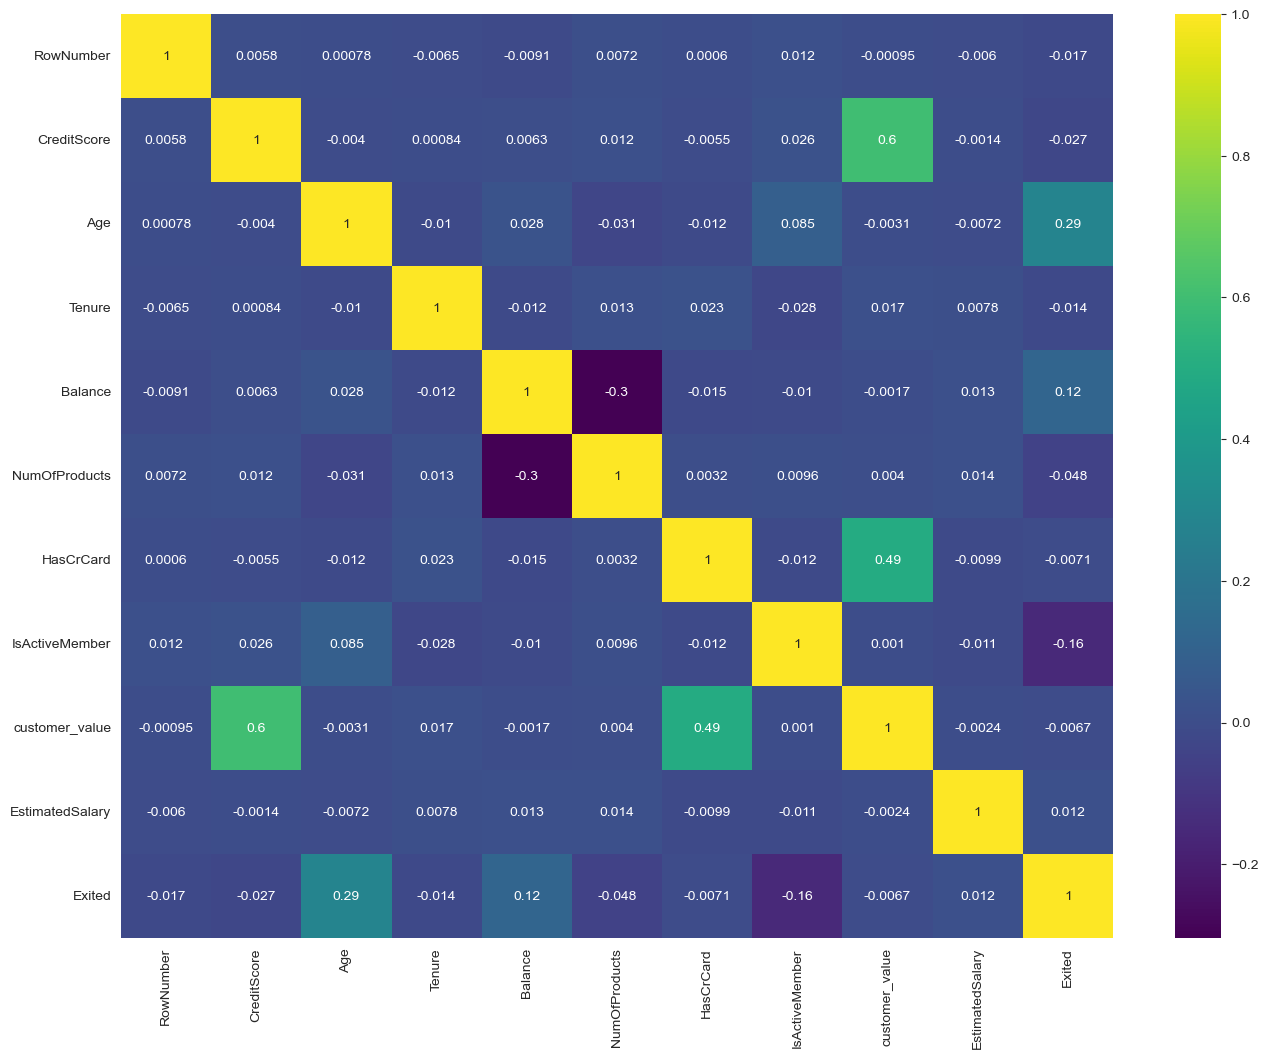

In [179]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [180]:
df = pd.get_dummies(df, drop_first=True)   #gender ve geography , drop_first=True ilk sınıf bırak
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,customer_value,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,1.0,101348.88,1,0,0,0
1,2,608,41,1,83807.86,1,0,1,0.0,112542.58,0,0,1,0
2,3,502,42,8,159660.80,3,1,0,1.0,113931.57,1,0,0,0
3,4,699,39,1,0.00,2,0,0,0.0,93826.63,0,0,0,0
4,5,850,43,2,125510.82,1,1,1,2.0,79084.10,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [182]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)

In [183]:
scaler = MinMaxScaler()

In [184]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [185]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [186]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [187]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 2s 9ms/step - loss: 0.6682 - recall: 0.4401 - val_loss: 0.5678 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5324 - recall: 6.0533e-04 - val_loss: 0.5015 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4999 - recall: 0.0000e+00 - val_loss: 0.4869 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4914 - recall: 6.0533e-04 - val_loss: 0.4788 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4855 - recall: 0.0024 - val_loss: 0.4717 - val_recall: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4807 - recall: 0.0163 - val_loss: 0.4650 - val_recall: 0.0221
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4760 - recall: 0.0285 - val_loss: 0.4583 - val_recall: 0.0663
Epoch 8/2

64/64 [==============================] - 0s 4ms/step - loss: 0.3523 - recall: 0.4377 - val_loss: 0.3113 - val_recall: 0.5083
Epoch 61/200
64/64 [==============================] - 0s 4ms/step - loss: 0.3538 - recall: 0.4292 - val_loss: 0.3169 - val_recall: 0.5580
Epoch 62/200
64/64 [==============================] - 0s 4ms/step - loss: 0.3528 - recall: 0.4413 - val_loss: 0.3103 - val_recall: 0.5138
Epoch 63/200
64/64 [==============================] - 0s 4ms/step - loss: 0.3522 - recall: 0.4316 - val_loss: 0.3131 - val_recall: 0.5580
Epoch 64/200
64/64 [==============================] - 0s 4ms/step - loss: 0.3514 - recall: 0.4310 - val_loss: 0.3107 - val_recall: 0.5083
Epoch 65/200
64/64 [==============================] - 0s 4ms/step - loss: 0.3510 - recall: 0.4274 - val_loss: 0.3096 - val_recall: 0.4917
Epoch 66/200
64/64 [==============================] - 0s 4ms/step - loss: 0.3510 - recall: 0.4262 - val_loss: 0.3082 - val_recall: 0.5083
Epoch 67/200
64/64 [===========================

In [188]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 16)                224       
                                                                 
 dense_79 (Dense)            (None, 8)                 136       
                                                                 
 dense_80 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [189]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.668163,0.440073,0.567773,0.0
1,0.532423,0.000605,0.501542,0.0
2,0.499857,0.000000,0.486948,0.0
3,0.491372,0.000605,0.478830,0.0
4,0.485455,0.002421,0.471667,0.0


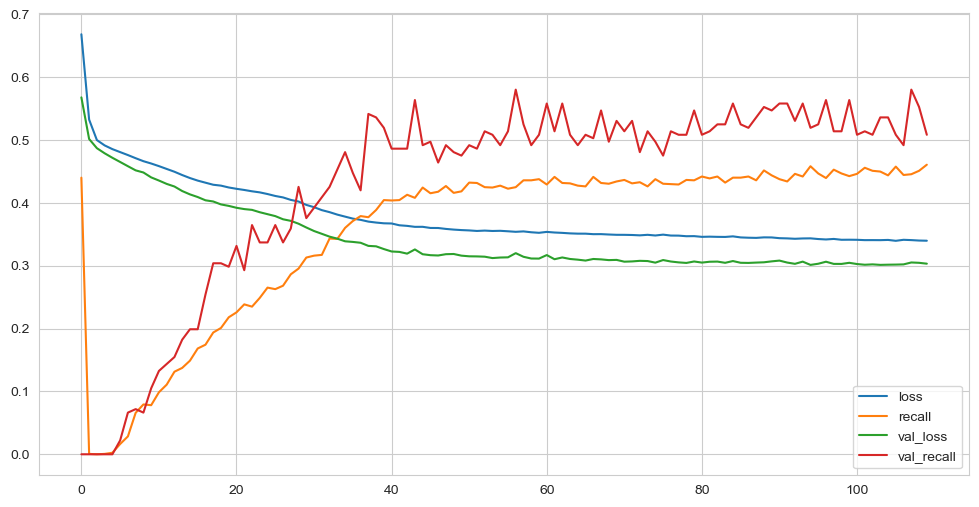

In [190]:
loss_df.plot()
plt.show()

In [123]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[758  38]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.49      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 3ms/step


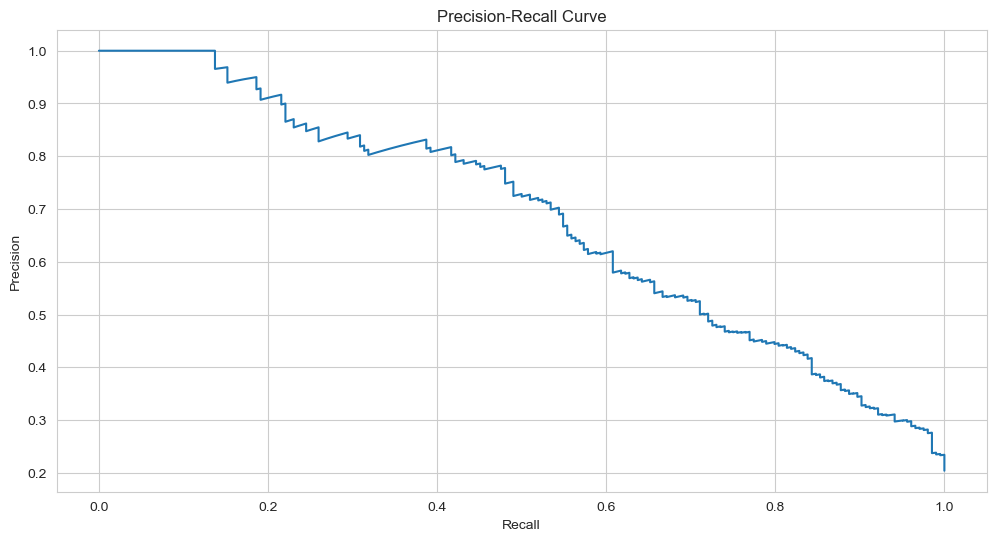

In [192]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [193]:
average_precision_score(y_test, y_pred_proba)

0.6826004220771109

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [194]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [125]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)
#compute_class_weight,  sınıf ağırlıklarını hesaplamak için kullanılır #'balanced' seçeneği, her sınıfın ağırlığını, o sınıfa ait olan örnek sayısına ters orantılı olarak ayarlar

In [126]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',  
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [127]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 2s 9ms/step - loss: 0.6971 - recall: 0.0642 - val_loss: 0.6082 - val_recall: 0.2210
Epoch 2/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6766 - recall: 0.3305 - val_loss: 0.5976 - val_recall: 0.4033
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6678 - recall: 0.4582 - val_loss: 0.5907 - val_recall: 0.5028
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6612 - recall: 0.5400 - val_loss: 0.5886 - val_recall: 0.5746
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6556 - recall: 0.5587 - val_loss: 0.5883 - val_recall: 0.6188
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6494 - recall: 0.6035 - val_loss: 0.5838 - val_recall: 0.6354
Epoch 7/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6438 - recall: 0.6217 - val_loss: 0.5920 - val_recall: 0.6906
Epoch 8/200
64/64 [======================

64/64 [==============================] - 0s 5ms/step - loss: 0.4792 - recall: 0.7851 - val_loss: 0.4354 - val_recall: 0.8122
Epoch 61/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4796 - recall: 0.7748 - val_loss: 0.4319 - val_recall: 0.8066
Epoch 62/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4783 - recall: 0.7778 - val_loss: 0.4301 - val_recall: 0.8066
Epoch 63/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4774 - recall: 0.7809 - val_loss: 0.4420 - val_recall: 0.8232
Epoch 64/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4762 - recall: 0.7809 - val_loss: 0.4300 - val_recall: 0.8177
Epoch 65/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4762 - recall: 0.7936 - val_loss: 0.4299 - val_recall: 0.8011
Epoch 66/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4752 - recall: 0.7682 - val_loss: 0.4433 - val_recall: 0.8232
Epoch 67/200
64/64 [===========================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [128]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.697115,0.064165,0.608170,0.220994
1,0.676585,0.330508,0.597634,0.403315
2,0.667805,0.458232,0.590745,0.502762
3,0.661188,0.539952,0.588557,0.574586
4,0.655550,0.558717,0.588331,0.618785


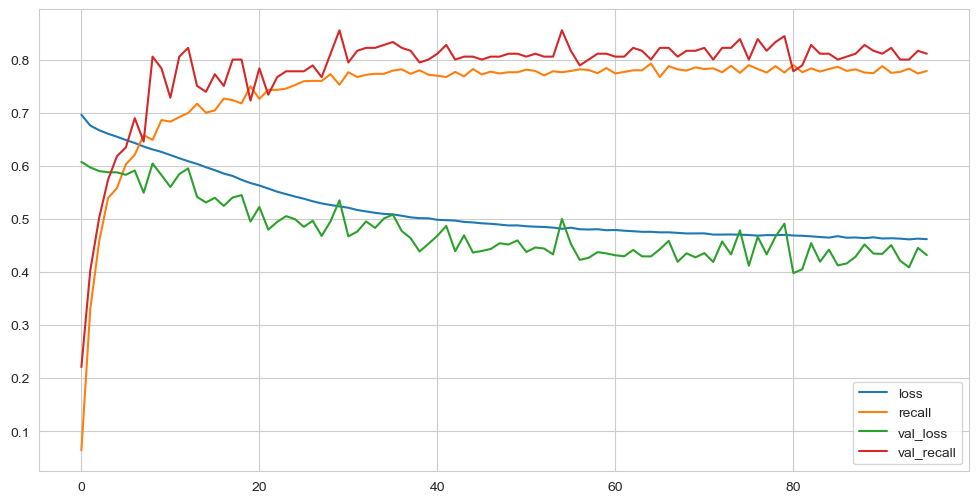

In [129]:
loss_df.plot()
plt.show()

In [130]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[616 180]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.85       796
           1       0.47      0.78      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.79      1000



32/32 [==============================] - 0s 3ms/step


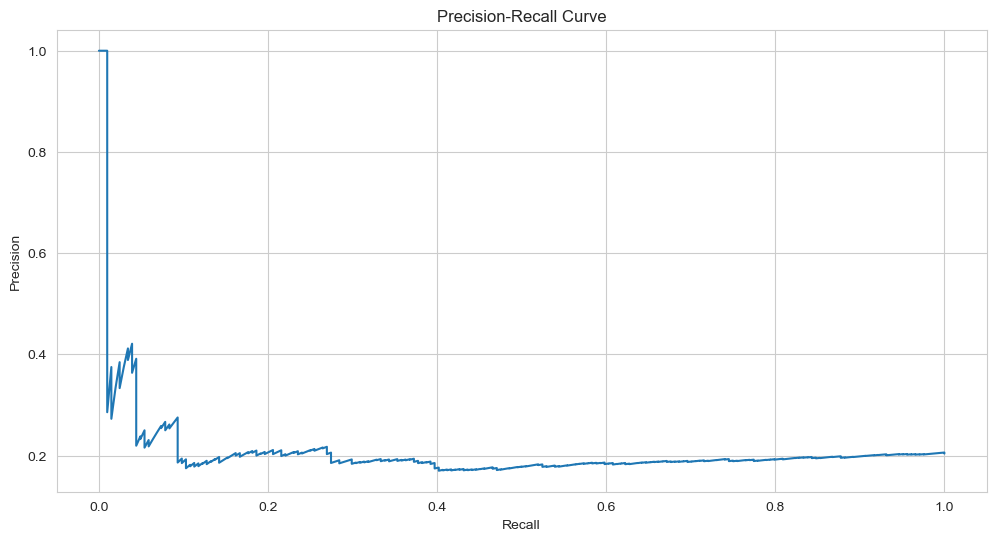

In [197]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [198]:
average_precision_score(y_test, y_pred_proba)

0.20916790826664394

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [225]:
from tensorflow.keras.optimizers import Adam

In [199]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [200]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [201]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 2s 9ms/step - loss: 0.6563 - recall: 0.5969 - val_loss: 0.5944 - val_recall: 0.6906
Epoch 2/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6148 - recall: 0.6598 - val_loss: 0.5087 - val_recall: 0.5635
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.5955 - recall: 0.6743 - val_loss: 0.5515 - val_recall: 0.7293
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5723 - recall: 0.6895 - val_loss: 0.5059 - val_recall: 0.7017
Epoch 5/200
64/64 [==============================] - 0s 5ms/step - loss: 0.5608 - recall: 0.6973 - val_loss: 0.5280 - val_recall: 0.7569
Epoch 6/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5406 - recall: 0.7264 - val_loss: 0.4411 - val_recall: 0.7127
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5240 - recall: 0.7470 - val_loss: 0.4119 - val_recall: 0.7403
Epoch 8/200
64/64 [======================

<Axes: >

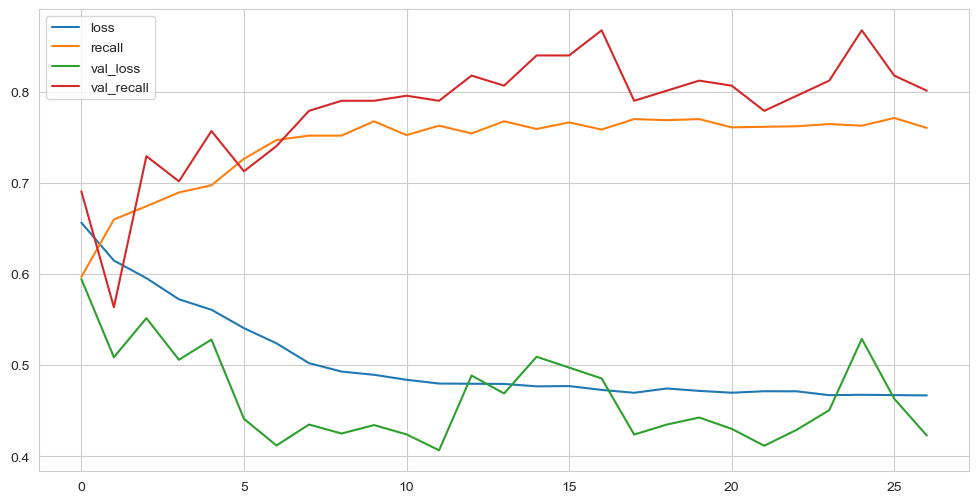

In [202]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

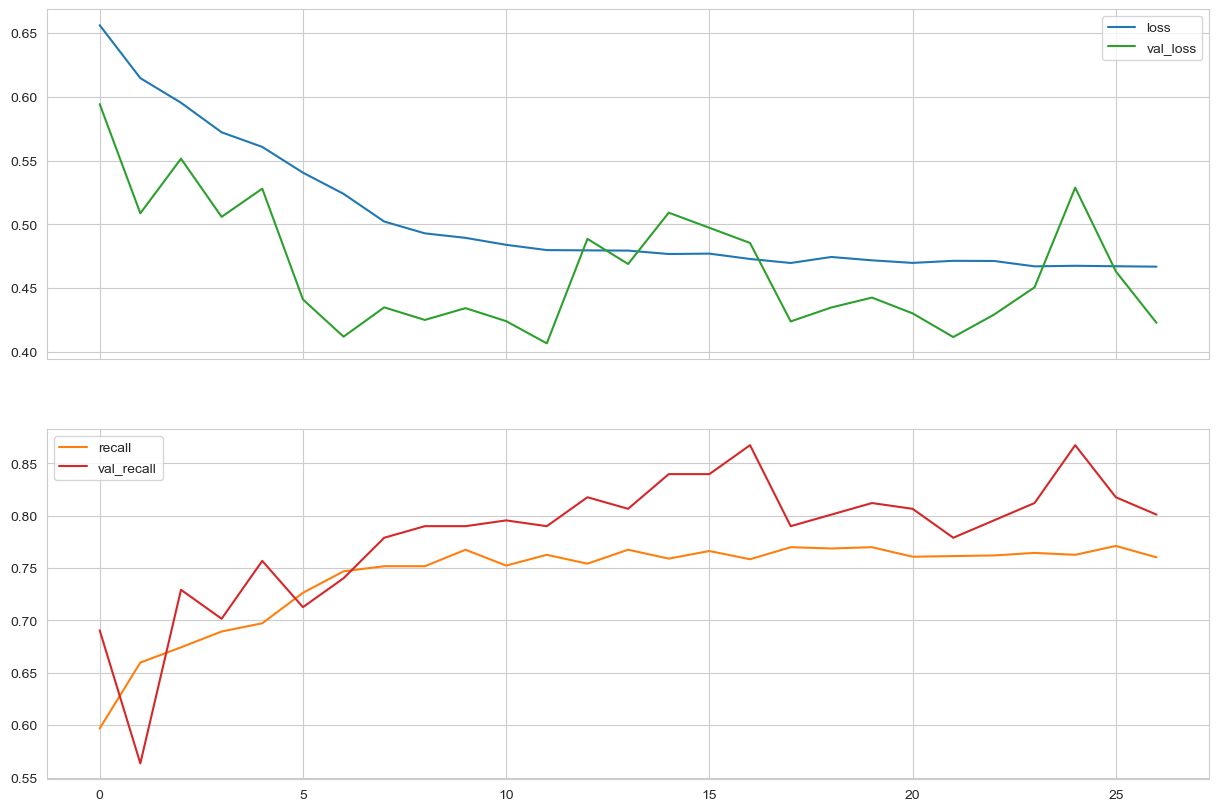

In [203]:
loss_df.plot(subplots=[['loss','val_loss'],['recall','val_recall']],layout=(2,1),figsize=(15,10));

In [204]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4463682472705841
recall:  0.7009803652763367


In [205]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[643 153]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.70      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.83      0.79      0.80      1000



In [209]:
model.save("model_churn_1.h5")

### Add Dropout Layer

In [139]:
from tensorflow.keras.layers import Dropout

In [206]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1])) 
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [207]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=200, verbose=1
)

Epoch 1/200
64/64 [==============================] - 2s 10ms/step - loss: 0.5867 - recall: 0.0611 - val_loss: 0.5272 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5614 - recall: 0.0224 - val_loss: 0.5173 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5459 - recall: 0.0085 - val_loss: 0.5061 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5427 - recall: 0.0048 - val_loss: 0.4965 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5298 - recall: 0.0018 - val_loss: 0.4938 - val_recall: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5213 - recall: 0.0012 - val_loss: 0.4869 - val_recall: 0.0000e+00
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5181 - recall: 0.0000e+00 - val_loss: 0.4815 - val_recall: 0.0000e+00
Epoch 8/

64/64 [==============================] - 0s 6ms/step - loss: 0.4353 - recall: 0.1538 - val_loss: 0.3896 - val_recall: 0.1713
Epoch 60/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4385 - recall: 0.1483 - val_loss: 0.3910 - val_recall: 0.1436
Epoch 61/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4355 - recall: 0.1368 - val_loss: 0.3870 - val_recall: 0.1768
Epoch 62/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4390 - recall: 0.1477 - val_loss: 0.3896 - val_recall: 0.1271
Epoch 63/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4330 - recall: 0.1568 - val_loss: 0.3842 - val_recall: 0.1934
Epoch 64/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4343 - recall: 0.1743 - val_loss: 0.3818 - val_recall: 0.1934
Epoch 65/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4332 - recall: 0.1531 - val_loss: 0.3834 - val_recall: 0.2155
Epoch 66/200
64/64 [===========================

64/64 [==============================] - 1s 8ms/step - loss: 0.4178 - recall: 0.2155 - val_loss: 0.3451 - val_recall: 0.3923
Epoch 119/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4138 - recall: 0.2349 - val_loss: 0.3443 - val_recall: 0.3978
Epoch 120/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4178 - recall: 0.2203 - val_loss: 0.3440 - val_recall: 0.4144
Epoch 121/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4126 - recall: 0.2234 - val_loss: 0.3405 - val_recall: 0.4088
Epoch 122/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4133 - recall: 0.2040 - val_loss: 0.3433 - val_recall: 0.3923
Epoch 123/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4126 - recall: 0.2161 - val_loss: 0.3426 - val_recall: 0.4088
Epoch 124/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4143 - recall: 0.2240 - val_loss: 0.3413 - val_recall: 0.4033
Epoch 125/200
64/64 [====================

64/64 [==============================] - 0s 5ms/step - loss: 0.4098 - recall: 0.2397 - val_loss: 0.3335 - val_recall: 0.4033
Epoch 178/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4102 - recall: 0.2179 - val_loss: 0.3342 - val_recall: 0.3978
Epoch 179/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4060 - recall: 0.2306 - val_loss: 0.3294 - val_recall: 0.4033
Epoch 180/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4073 - recall: 0.2433 - val_loss: 0.3338 - val_recall: 0.4033
Epoch 181/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4088 - recall: 0.2312 - val_loss: 0.3317 - val_recall: 0.4088
Epoch 182/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4082 - recall: 0.2361 - val_loss: 0.3270 - val_recall: 0.4475
Epoch 183/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4112 - recall: 0.2397 - val_loss: 0.3322 - val_recall: 0.4033
Epoch 184/200
64/64 [====================

<Axes: >

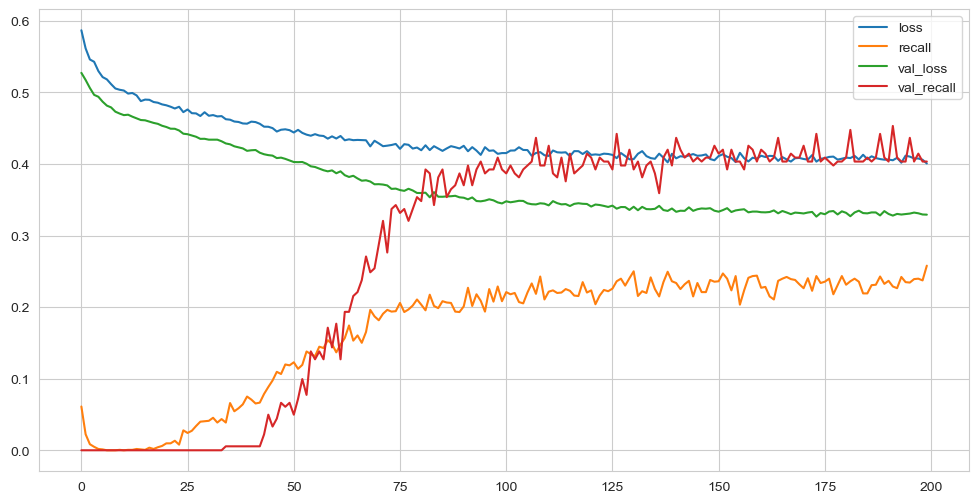

In [208]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [210]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.36150339245796204
recall:  0.3186274468898773


In [211]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[782  14]
 [139  65]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       796
           1       0.82      0.32      0.46       204

    accuracy                           0.85      1000
   macro avg       0.84      0.65      0.69      1000
weighted avg       0.84      0.85      0.82      1000



In [212]:
model.save("model_cancer_2.h5")

### Add Early Stop

#### Monitor the "val_loss" as metric

In [142]:
from tensorflow.keras.callbacks import EarlyStopping

In [213]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

#### Monitor the "val_recall" as metric

In [216]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [217]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4648 - recall: 0.0805 - val_loss: 0.4447 - val_recall: 0.1381
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4634 - recall: 0.0902 - val_loss: 0.4426 - val_recall: 0.1160
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4615 - recall: 0.1090 - val_loss: 0.4406 - val_recall: 0.1436
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4601 - recall: 0.1029 - val_loss: 0.4387 - val_recall: 0.1602
Epoch 5/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4584 - recall: 0.1132 - val_loss: 0.4367 - val_recall: 0.1602
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4567 - recall: 0.1211 - val_loss: 0.4346 - val_recall: 0.1657
Epoch 7/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4551 - recall: 0.1308 - val_loss: 0.4322 - val_recall: 0.1657
Epoch 8/200
64/64 [======================

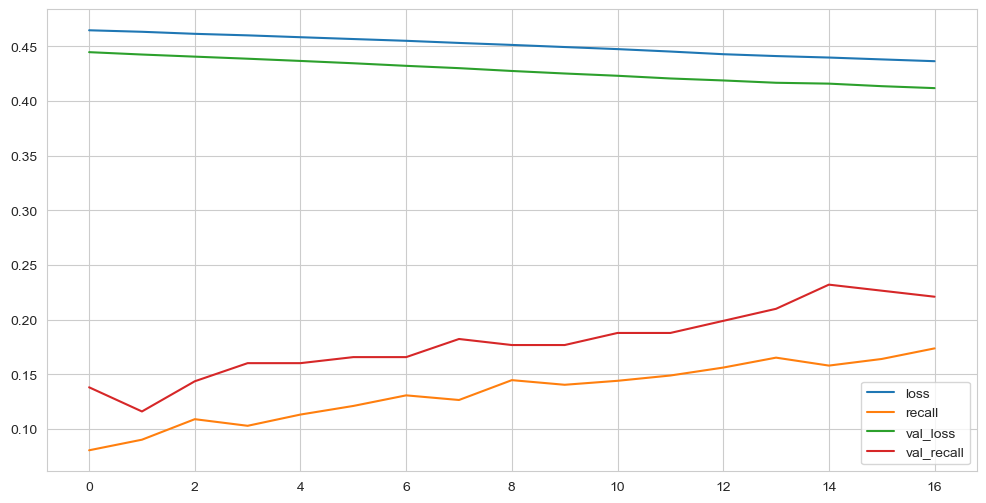

In [218]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [219]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4599197506904602
recall:  0.10784313827753067


In [220]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[783  13]
 [182  22]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       796
           1       0.63      0.11      0.18       204

    accuracy                           0.81      1000
   macro avg       0.72      0.55      0.54      1000
weighted avg       0.77      0.81      0.75      1000



## Optuna

In [150]:
!pip install optuna

     -------------------------------------- 409.6/409.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 226.8/226.8 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [151]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [221]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [222]:
trial_metric = "Recall"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [223]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-13 02:12:21,618] A new study created in memory with name: no-name-26d39f15-0a22-44c4-a5d3-a53d3ce48e72
[I 2023-11-13 02:12:58,425] Trial 0 finished with value: 0.1764705926179886 and parameters: {'n_units1': 23, 'n_units2': 87, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 2.6995051896269205e-05, 'w0': 2.0909695570634166, 'w1': 2.7656226355429836}. Best is trial 0 with value: 0.1764705926179886.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2023-11-13 02:13:15,550] Trial 1 finished with value: 0.4313725531101227 and parameters: {'n_units1': 116, 'n_units2': 85, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.010069324025277483, 'w0': 0.09763581397430414, 'w1': 0.06637344453402612}. Best is trial 1 with value: 0.4313725531101227.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-13 02:13:22,705] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 127, 'n_units2': 94, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0004054182439937147, 'w0': 4.564113966641905, 'w1': 0.010311478191134966}. Best is trial 1 with value: 0.4313725531101227.


Restoring model weights from the end of the best epoch: 64.
Epoch 79: early stopping


[I 2023-11-13 02:13:55,415] Trial 3 finished with value: 0.3382352888584137 and parameters: {'n_units1': 21, 'n_units2': 54, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0013470688337597198, 'w0': 0.2724579752031242, 'w1': 0.08943692033229371}. Best is trial 1 with value: 0.4313725531101227.
[I 2023-11-13 02:14:33,716] Trial 4 finished with value: 0.593137264251709 and parameters: {'n_units1': 70, 'n_units2': 61, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.954489967004381e-05, 'w0': 0.06949959855124306, 'w1': 0.21234241445766971}. Best is trial 4 with value: 0.593137264251709.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-11-13 02:14:44,651] Trial 5 finished with value: 0.7647058963775635 and parameters: {'n_units1': 58, 'n_units2': 78, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12337946019100403, 'w0': 0.02965617396303375, 'w1': 0.16952126760910405}. Best is trial 5 with value: 0.7647058963775635.
[I 2023-11-13 02:15:27,300] Trial 6 finished with value: 0.46568626165390015 and parameters: {'n_units1': 115, 'n_units2': 43, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0002770349420825197, 'w0': 1.980490225653138, 'w1': 2.3227631875024812}. Best is trial 5 with value: 0.7647058963775635.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-13 02:15:35,324] Trial 7 finished with value: 0.014705882407724857 and parameters: {'n_units1': 93, 'n_units2': 57, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.330499121668189e-05, 'w0': 0.07973454979414325, 'w1': 3.9564746850366688}. Best is trial 5 with value: 0.7647058963775635.
[I 2023-11-13 02:16:11,754] Trial 8 finished with value: 0.37254902720451355 and parameters: {'n_units1': 48, 'n_units2': 66, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001869960048705121, 'w0': 0.05566576017063928, 'w1': 0.06477743707056731}. Best is trial 5 with value: 0.7647058963775635.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-11-13 02:16:19,716] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 52, 'n_units2': 115, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.04003125276685901, 'w0': 0.4903380963621168, 'w1': 0.11552781072455465}. Best is trial 5 with value: 0.7647058963775635.


{'n_units1': 58,
 'n_units2': 78,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.12337946019100403,
 'w0': 0.02965617396303375,
 'w1': 0.16952126760910405}

In [242]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [243]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

<Axes: >

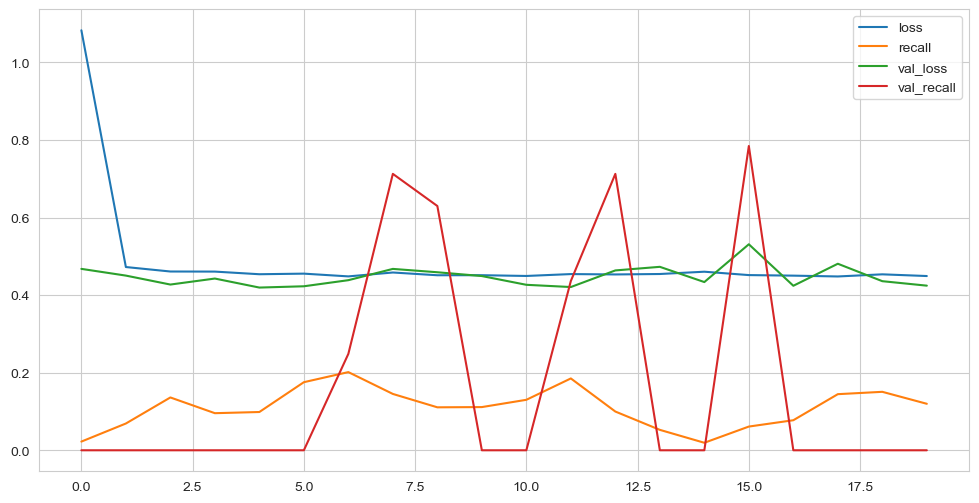

In [235]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [236]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4413566589355469
recall:  0.0


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [226]:
history = model.history.history

In [227]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



32/32 [==============================] - 0s 3ms/step


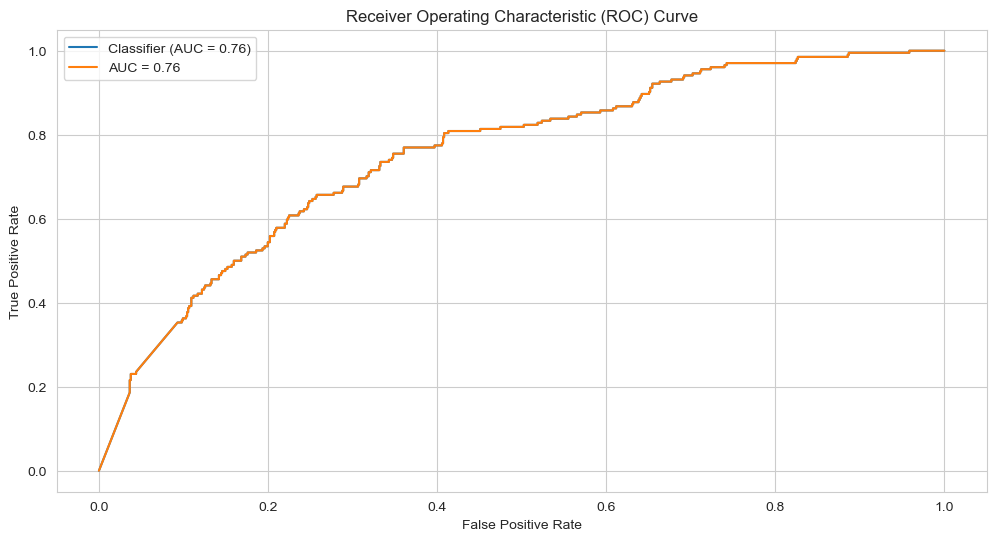

In [230]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [231]:
roc_auc_score(y_test, y_pred_proba)

0.7553391959798994

# Final Model and Model Deployment

In [238]:
import pickle
from tensorflow.keras.models import load_model

In [239]:
pickle.dump(scaler, open("scaler_churn", "wb"))

In [260]:
model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 2s 9ms/step - loss: 0.6578 - recall: 0.6367 - val_loss: 0.6192 - val_recall: 0.5637
Epoch 2/200
71/71 [==============================] - 0s 4ms/step - loss: 0.6064 - recall: 0.6568 - val_loss: 0.5844 - val_recall: 0.6618
Epoch 3/200
71/71 [==============================] - 0s 6ms/step - loss: 0.5832 - recall: 0.6890 - val_loss: 0.5538 - val_recall: 0.6471
Epoch 4/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5781 - recall: 0.6901 - val_loss: 0.5233 - val_recall: 0.5882
Epoch 5/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5793 - recall: 0.6710 - val_loss: 0.5923 - val_recall: 0.7010
Epoch 6/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5662 - recall: 0.6956 - val_loss: 0.5714 - val_recall: 0.7255
Epoch 7/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5449 - recall: 0.7229 - val_loss: 0.4951 - val_recall: 0.6863
Epoch 8/200
71/71 [======================

In [244]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',  
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

<Axes: >

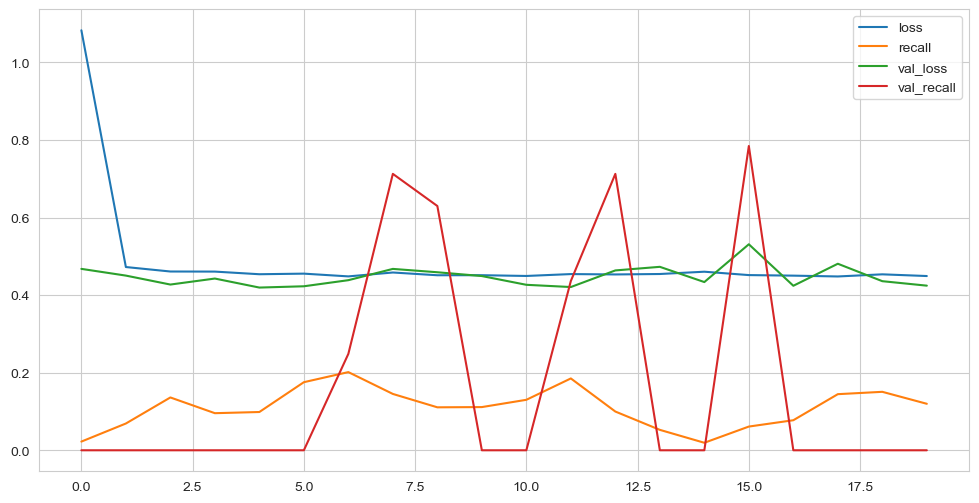

In [240]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [241]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4413566589355469
recall:  0.0


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save("model_churn.h5")

In [245]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 9ms/step - loss: 2.1282 - recall: 0.6120 - val_loss: 0.4994 - val_recall: 0.0055
Epoch 2/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6425 - recall: 0.5527 - val_loss: 0.4594 - val_recall: 0.5028
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6057 - recall: 0.6235 - val_loss: 0.8988 - val_recall: 0.9337
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6030 - recall: 0.6162 - val_loss: 1.3587 - val_recall: 0.9834
Epoch 5/200
64/64 [==============================] - 0s 5ms/step - loss: 0.5999 - recall: 0.6538 - val_loss: 0.4655 - val_recall: 0.5912
Epoch 6/200
64/64 [==============================] - 0s 8ms/step - loss: 0.5848 - recall: 0.6174 - val_loss: 0.5425 - val_recall: 0.6740
Epoch 7/200
64/64 [==============================] - 0s 5ms/step - loss: 0.5816 - recall: 0.6277 - val_loss: 0.4804 - val_recall: 0.6298
Epoch 8/200
64/64 [======================

<Axes: >

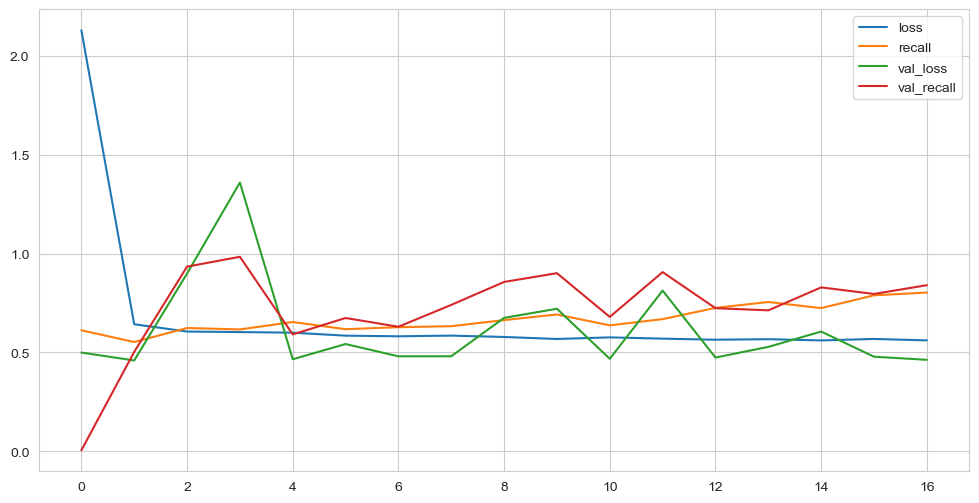

In [246]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [249]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[479 317]
 [ 38 166]]
              precision    recall  f1-score   support

           0       0.93      0.60      0.73       796
           1       0.34      0.81      0.48       204

    accuracy                           0.65      1000
   macro avg       0.64      0.71      0.61      1000
weighted avg       0.81      0.65      0.68      1000



In [250]:
model.save("model_churn_1.h5")

## Prediction

In [254]:
single_customer = df.drop("Exited", axis=1).iloc[0:1, :]
single_customer

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,customer_value,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.0,1,1,1,1.0,101348.88,0,0,0


In [256]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.        , 0.538     , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.5       , 0.50673489,
        0.        , 0.        , 0.        ]])

In [257]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 97ms/step


array([[0]])

In [ ]:
df["Exited"].iloc[0]

In [258]:
model_churn.predict(single_customer)

1/1 [==============================] - 0s 49ms/step


array([[0.1856091]], dtype=float32)

In [259]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___